# ARMA models
Feb 23th 2021

In [127]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# Custom functions:
from src.timeseriesFunctions import plot_time_series
pd.options.display.float_format = '{:,.2f}'.format
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (13, 5)
plt.rcParams['figure.figsize']= plotsize

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_3/1_arma_models


## 1) Autoregressive (AR) models

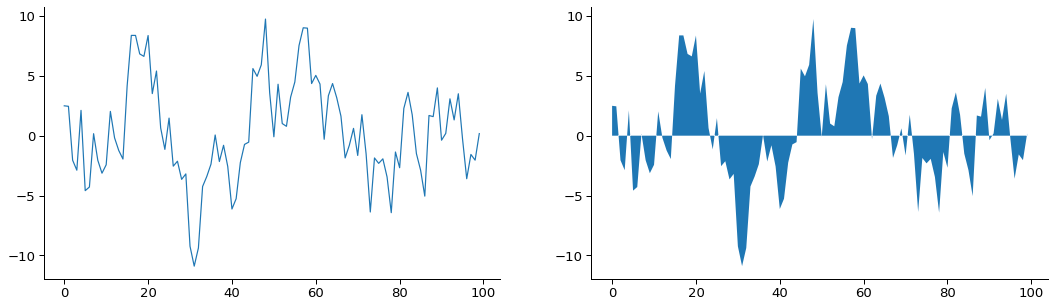

In [109]:
np.random.seed(123)

time= np.arange(100)
ar1_sample= np.zeros(100)
ar1_sample[0] += np.random.normal(loc= 0, scale= 2.5, size= 1)

for t in time:
    # AR model: using lags, betha= 0.7
    ar1_sample[t] = (0.7* ar1_sample[t-1]+ np.random.normal(loc= 0, scale= 2.5, size= 1))

# Plot:
fig, axes= plt.subplots(1,2)
fig.set_figwidth(18)

axes[0].plot(time, ar1_sample)
axes[1].fill_between(time, ar1_sample)

plt.show()

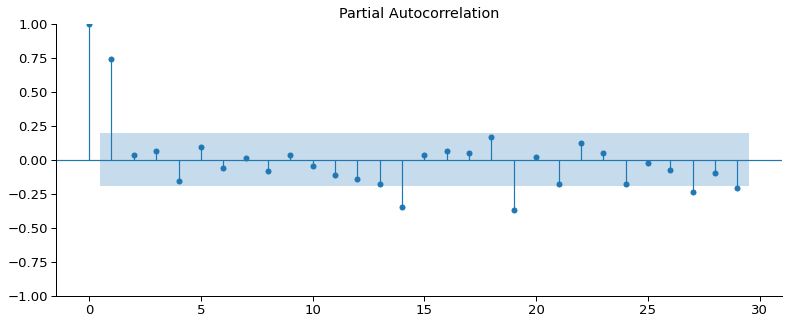

In [128]:
fig_ar1= plot_pacf(ar1_sample, lags= range(0,30), alpha= 0.05)

In [54]:
model= ARIMA(ar1_sample, order= (1,0,0)).fit()
# print(model.param_terms)
# print(model.param_names)
# print(model.params)
print("Betha-produced: 0.7\nBetha-estimated: {:.2f}".format(model.params[1]))

Betha-produced: 0.7
Betha-estimated: 0.73


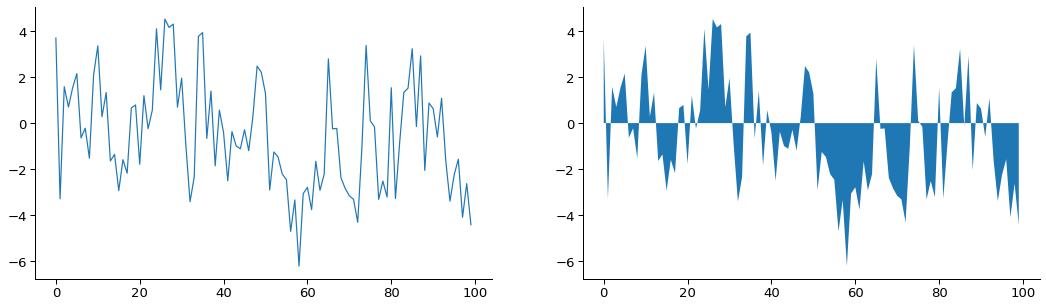

In [123]:
# Second estimation: 
np.random.seed(112)
# Mean is again 0
ar2_sample = np.zeros(100)

# Two random values:
ar2_sample[0:2] += np.random.normal(loc=0, scale=2.5, size=2)
# AR (2) with betha 0.3
for t in time[2:]:
    ar2_sample[t] = (0.3 * ar2_sample[t-1]) + (0.3 * ar2_sample[t-2]) + np.random.normal(loc=0, scale=2.5, size=1)
    
# Plot 
fig, axes= plt.subplots(1,2)
fig.set_figwidth(18)

axes[0].plot(time, ar2_sample)
axes[1].fill_between(time, ar2_sample)

plt.show()

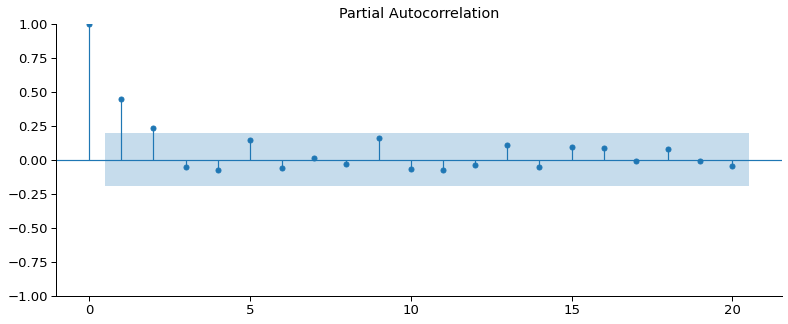

In [129]:
fig_ar2= plot_pacf(ar2_sample)

In [130]:
model= ARIMA(ar2_sample, order= (2,0,0)).fit()
# print(model.params)
print("Betha-1: {:.4f} and Betha-2: {:.4f}".format(model.params[1], model.params[2]))

Betha-1: 0.3525 and Betha-2: 0.2333


You can generate AR sample data with: **arma_generate_sample**

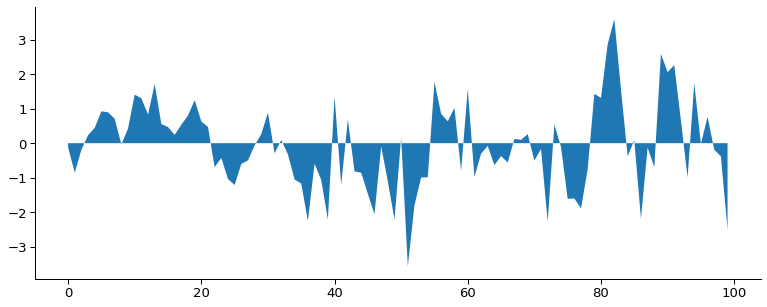

In [75]:
# Generate an AR dataset through arma_generate_sample
arparams = np.array([0.3,0.3])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

plt.fill_between(time,y)
plt.show()

In [74]:
model= ARIMA(y, order= (2,0,0)).fit()
print("Betha 1: {:.4f}, Betha 2: {:.4f}".format(model.params[1], model.params[2]) )

Betha 1: 0.1229, Betha 2: 0.3538


## 2) Moving Average (MA) models
MA models != MA smoothing

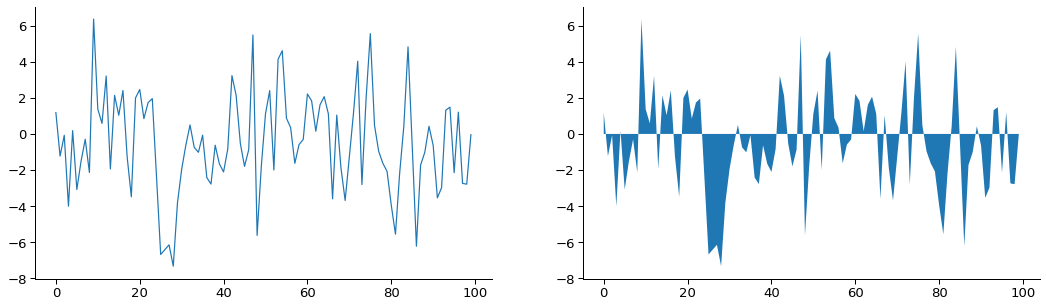

In [119]:
np.random.seed(12)

time= np.arange(100)
ma1_sample= np.zeros(100)
# Create a vector of random normally distributed errors
error= np.random.normal(loc= 0, scale= 2.5, size= 100)
ma1_sample[0] += error[0]

for t in time[1:]:
    ma1_sample[t] = (0.4 * error[t-1]) + error[t]

# Plot
fig, axes= plt.subplots(1,2)
fig.set_figwidth(18)

axes[0].plot(time, ma1_sample)
axes[1].fill_between(time, ma1_sample)

plt.show()

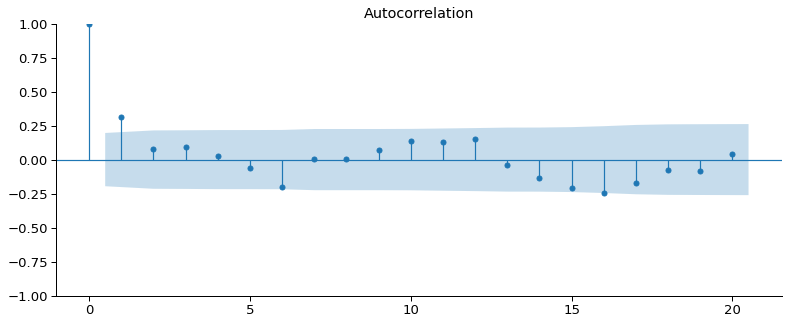

In [120]:
fig_ma1= plot_acf(ma1_sample)

In [92]:
model= ARIMA(ma1_sample, order= (0,0,1)).fit()
print("Betha-estimation: {:.4f}".format(model.params[1]))

Betha-estimation: 0.3275


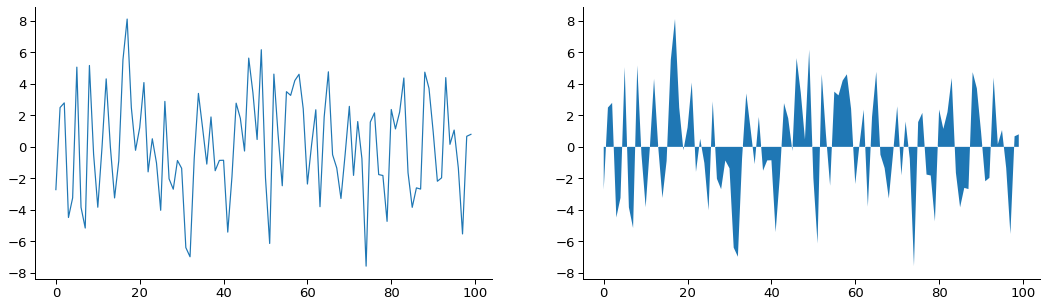

In [121]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)
ma2_sample = np.zeros(100)
error = np.random.normal(loc=0, scale=2.5, size=100)
ma2_sample[0:2] = error[0:2]
#regress future values on linear functino of prior two errors plus current error
for t in time[2:]:
    ma2_sample[t] = (0.4 * error[t-1]) + (-0.4 * error[t-2]) + error[t]

# Plot
fig, axes= plt.subplots(1,2)
fig.set_figwidth(18)

axes[0].plot(time, ma2_sample)
axes[1].fill_between(time, ma2_sample)

plt.show()

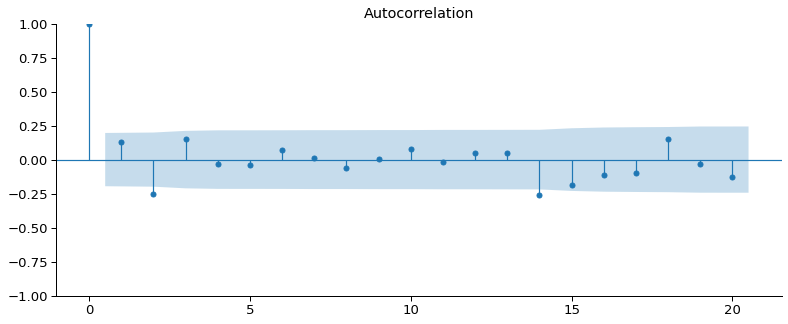

In [122]:
fig_ma2= plot_acf(ma2_sample)

In [131]:
model= ARIMA(ma2_sample, order= (0,0,2)).fit()
print("Betha1-estimated: {:.4f}\t Betha2-estimated: {:.4f}".format(model.params[1], model.params[2]))

Betha1-estimated: 0.4584	 Betha2-estimated: -0.4141


You can generate AR sample data with: **arma_generate_sample**

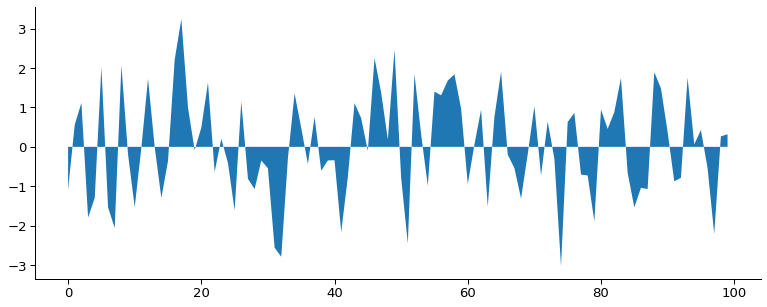

In [105]:
# Below is function to help in generating different series
np.random.seed(123)
arparams = np.array([0])
maparams = np.array([0.4,-0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

plt.fill_between(time, y)
plt.show()

In [107]:
model= ARIMA(y, order= (0,0,2)).fit()
print("Betha1-estimated: {:.4f}\t Betha2-estimated: {:.4f}".format(model.params[1], model.params[2]))

Betha1-estimated: 0.4586	 Betha2-estimated: -0.4114
